In [1]:
import git_access
import json
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

In [3]:
access_token = '**'
repo_owner = 'rspec'
source_type = 'github_repo'
git_url = 'git://github.com/rspec/rspec-rails.git'
api_base_url = 'http://api.github.com'
repo_name = 'rspec-rails'
url_type = 'issues'
url_details = 'comments'
client = git_access.GitHubClient({'access_token': access_token,
                       'repo_owner': repo_owner, 
                       'source_type': source_type, 
                       'git_url': git_url, 
                       'api_base_url': api_base_url, 
                       'repo_name': repo_name}) 
base_url = api_base_url + '/repos/' + repo_owner + '/' + repo_name + '/' + url_type
advanced_url = base_url + '/' + url_details
x = [0]*100
check = 1
page_number = 1
comments_details = []
while len(x) >= 100:
    check -= 1
    paged_url = advanced_url + '?page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['issue_url'][len(base_url)+2:]
        user_logon = x[i]['user']['login']
        author_association = x[i]['author_association']
        comments_details.append([issue_number,user_logon,author_association])

http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=1&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=2&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=3&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=4&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=5&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=6&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=7&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=8&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=9&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=10&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=11&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=12&per_page=100
http://api.gi

In [5]:
x = [0]*100
check = 1
page_number = 1
issue_details = []
while len(x) >= 100:
    check -= 1
    paged_url = base_url + '?state=' + 'all' + '&page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['number']
        user_logon = x[i]['user']['login']
        author_type = x[i]['user']['type']
        issue_details.append([issue_number,user_logon,author_type])

http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=1&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=2&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=3&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=4&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=5&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=6&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=7&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=8&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=9&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=10&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=11&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=12&per_page=100
h

In [6]:
comments_details_df = pd.DataFrame(comments_details, columns = ['Issue_id','user_logon','commenter_type'])
issue_details_df = pd.DataFrame(issue_details, columns = ['Issue_id','user_logon','commenter_type'])

In [7]:
comments_details_df.drop(['commenter_type'], inplace=True, axis = 1)
issue_details_df.drop(['commenter_type'], inplace=True, axis = 1)

In [8]:
comm_details_df = pd.concat([comments_details_df,issue_details_df])

In [9]:
uniq_issues = comm_details_df.Issue_id.unique()
uniq_users = comm_details_df.user_logon.unique()
connection_matrix = np.ndarray(shape=(len(uniq_users),len(uniq_users)))
connection_matrix = np.zeros((len(uniq_users),len(uniq_users)), dtype=np.int)
user_dict = {}
rev_user_dict = {}
user_id = 0
for i in range(len(uniq_users)):
    user_dict[uniq_users[i]] = user_id
    rev_user_dict[user_id] = uniq_users[i]
    user_id += 1
for i in uniq_issues:
    issue_specific = comm_details_df[comm_details_df['Issue_id'] == i]
    participents = issue_specific.user_logon.unique()
    for j in range(len(participents)):
        comment_from = participents[j]
        comment_count = issue_specific[issue_specific['user_logon'] == comment_from].shape
        if len(participents) == 1:
            continue
        comment_to = np.delete(participents,np.where(participents == comment_from))
        for k in comment_to:
            connection_matrix[user_dict[comment_from]][user_dict[k]] += len(comment_count)

In [10]:
%matplotlib inline
def show_graph_with_labels(matrix):
    gr = nx.Graph()
    rows,cols = np.where(matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    #plt.figure(num=None, figsize = (100,100), dpi = 50, facecolor='w', edgecolor='k')
    #nx.draw(gr, node_size=500)
    #plt.show()
    return gr.degree(gr.nodes()),gr

In [11]:
degree, G = show_graph_with_labels(connection_matrix)

In [12]:
x = list(degree.values())
x.sort()
x = np.log(x)

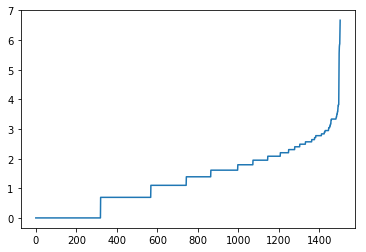

In [13]:
plt.plot(x)

In [4]:
len(comments_details)

9241

In [14]:
uniq_users

array(['kristianmandrup', 'mbj', 'dchelimsky', ..., 'biilmann', 'wout',
       'rspec'], dtype=object)

In [17]:
url_type = 'users'
base_url = api_base_url + '/' + url_type
advanced_url = base_url
user_mapping = []
for user in uniq_users:
    check -= 1
    paged_url = advanced_url + '/' + user
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    user_name = x['name']
    user_logon = x['login']
    user_mapping.append([user_name,user_logon])

http://api.github.com/users/kristianmandrup
http://api.github.com/users/mbj
http://api.github.com/users/dchelimsky
http://api.github.com/users/tmilker
http://api.github.com/users/dmathieu
http://api.github.com/users/veezus
http://api.github.com/users/ethangunderson
http://api.github.com/users/novroy
http://api.github.com/users/yzhrain
http://api.github.com/users/jbpros
http://api.github.com/users/cgs
http://api.github.com/users/chrisconley
http://api.github.com/users/keeran
http://api.github.com/users/Houdini
http://api.github.com/users/spicycode
http://api.github.com/users/nclark
http://api.github.com/users/vojto
http://api.github.com/users/levifig
http://api.github.com/users/enricob
http://api.github.com/users/phs
http://api.github.com/users/epitron
http://api.github.com/users/juvenn
http://api.github.com/users/tibastral
http://api.github.com/users/iain
http://api.github.com/users/alfanick
http://api.github.com/users/dbackeus
http://api.github.com/users/kangster
http://api.github.com

http://api.github.com/users/neezer
http://api.github.com/users/DaveTong
http://api.github.com/users/jensb
http://api.github.com/users/3dd13
http://api.github.com/users/capotej
http://api.github.com/users/thiago-vieira
http://api.github.com/users/ewollesen
http://api.github.com/users/panterch
http://api.github.com/users/kaiwren
http://api.github.com/users/alexrothenberg
http://api.github.com/users/raskchanky
http://api.github.com/users/peppyheppy
http://api.github.com/users/andersonleite
http://api.github.com/users/myronmarston
http://api.github.com/users/HugoLnx
http://api.github.com/users/thoughtless
http://api.github.com/users/bquorning
http://api.github.com/users/simonc
http://api.github.com/users/dkowis
http://api.github.com/users/mattsnyder
http://api.github.com/users/alindeman
http://api.github.com/users/bgates
http://api.github.com/users/adambair
http://api.github.com/users/amkirwan
http://api.github.com/users/burtlo
http://api.github.com/users/amerine
http://api.github.com/user

http://api.github.com/users/photomattmills
http://api.github.com/users/midas
http://api.github.com/users/jjanavicius
http://api.github.com/users/lidaobing
http://api.github.com/users/runeb
http://api.github.com/users/Penay
http://api.github.com/users/kennethkalmer
http://api.github.com/users/tylergannon
http://api.github.com/users/cokron
http://api.github.com/users/quaternion
http://api.github.com/users/brentgreeff
http://api.github.com/users/zawaideh
http://api.github.com/users/ipsbfiend
http://api.github.com/users/zamith
http://api.github.com/users/jackdempsey
http://api.github.com/users/christopherlai
http://api.github.com/users/dakimaru
http://api.github.com/users/kirs
http://api.github.com/users/maxwell
http://api.github.com/users/edrex-janrain
http://api.github.com/users/MattRogish
http://api.github.com/users/mcwqy9
http://api.github.com/users/joelturnbull
http://api.github.com/users/yuvilio
http://api.github.com/users/karl-petter
http://api.github.com/users/agibralter
http://api

http://api.github.com/users/jasonrclark
http://api.github.com/users/nayefc
http://api.github.com/users/lightcap
http://api.github.com/users/ronwsmith
http://api.github.com/users/Jeewes
http://api.github.com/users/DawidJanczak
http://api.github.com/users/johanneswuerbach
http://api.github.com/users/Crunch09
http://api.github.com/users/shyam-habarakada
http://api.github.com/users/bricker
http://api.github.com/users/pawel2105
http://api.github.com/users/xaviershay
http://api.github.com/users/cupakromer
http://api.github.com/users/chris-teague
http://api.github.com/users/DanielHeath
http://api.github.com/users/todd
http://api.github.com/users/fatgeekuk
http://api.github.com/users/jimmycuadra
http://api.github.com/users/tadast
http://api.github.com/users/einarj
http://api.github.com/users/jeremywrowe
http://api.github.com/users/Intrepidd
http://api.github.com/users/TylerRick
http://api.github.com/users/adbatista
http://api.github.com/users/rudolph9
http://api.github.com/users/alkema
http://

http://api.github.com/users/hgupta
http://api.github.com/users/gruen
http://api.github.com/users/jorihardman
http://api.github.com/users/jasnow
http://api.github.com/users/bjoernalbers
http://api.github.com/users/lukexuanliu
http://api.github.com/users/anujbiyani
http://api.github.com/users/Fivell
http://api.github.com/users/coffeejunk
http://api.github.com/users/taelor
http://api.github.com/users/mmwtsn
http://api.github.com/users/JuanitoFatas
http://api.github.com/users/kcny
http://api.github.com/users/takashi
http://api.github.com/users/Vorob-Astronaut
http://api.github.com/users/zoinks10
http://api.github.com/users/rubystar
http://api.github.com/users/reconstructions
http://api.github.com/users/heaven
http://api.github.com/users/aprescott
http://api.github.com/users/willcosgrove
http://api.github.com/users/espadrine
http://api.github.com/users/eriktrautman
http://api.github.com/users/vuthaihoc
http://api.github.com/users/VincentZhao
http://api.github.com/users/lichtamberg
http://ap

http://api.github.com/users/rezadehganpour
http://api.github.com/users/a-leung
http://api.github.com/users/Ferdy89
http://api.github.com/users/fernandomm
http://api.github.com/users/adsteel
http://api.github.com/users/vasspilka
http://api.github.com/users/d3crypt3d
http://api.github.com/users/mikegrassotti
http://api.github.com/users/jessieay
http://api.github.com/users/sheharyarn
http://api.github.com/users/JayTeeSF
http://api.github.com/users/jaredhales
http://api.github.com/users/speedywizard
http://api.github.com/users/fcheung
http://api.github.com/users/kalleth
http://api.github.com/users/jhawthorn
http://api.github.com/users/codeodor
http://api.github.com/users/robbkidd
http://api.github.com/users/robuye
http://api.github.com/users/rochers
http://api.github.com/users/kjohnston
http://api.github.com/users/gingerlime
http://api.github.com/users/Jelkster
http://api.github.com/users/dougal
http://api.github.com/users/mattfreer-mdsol
http://api.github.com/users/jalkoby
http://api.gith

http://api.github.com/users/jrmhaig
http://api.github.com/users/mikegee
http://api.github.com/users/prasanthrubyist
http://api.github.com/users/ppires
http://api.github.com/users/jaysonbucy
http://api.github.com/users/adimircolen
http://api.github.com/users/maikokuppe
http://api.github.com/users/gamesover
http://api.github.com/users/lacostenycoder
http://api.github.com/users/joelmichael
http://api.github.com/users/UsmanMalik
http://api.github.com/users/terratakashi
http://api.github.com/users/benbonnet
http://api.github.com/users/thongncvn
http://api.github.com/users/ksnyder
http://api.github.com/users/typeoneerror
http://api.github.com/users/Rollson
http://api.github.com/users/sebastialonso
http://api.github.com/users/sharplet
http://api.github.com/users/yui-knk
http://api.github.com/users/se3000
http://api.github.com/users/masterkain
http://api.github.com/users/jasonfb
http://api.github.com/users/Tr4pSt3R
http://api.github.com/users/hughevans
http://api.github.com/users/wolfpakz
http

http://api.github.com/users/annacruz
http://api.github.com/users/olivierlacan
http://api.github.com/users/ta1kt0me
http://api.github.com/users/composerinteralia
http://api.github.com/users/Epigene
http://api.github.com/users/ivko999
http://api.github.com/users/artur79
http://api.github.com/users/NikitaKolokoltsev
http://api.github.com/users/rjaralikatti
http://api.github.com/users/axos88
http://api.github.com/users/knappe
http://api.github.com/users/joshuapinter
http://api.github.com/users/pjscopeland
http://api.github.com/users/bottles9
http://api.github.com/users/georgemillo
http://api.github.com/users/sapnaSpaceo
http://api.github.com/users/mikehale
http://api.github.com/users/faucct
http://api.github.com/users/hayesr
http://api.github.com/users/thomascchen
http://api.github.com/users/adnan358
http://api.github.com/users/lcpgm
http://api.github.com/users/oniofchaos
http://api.github.com/users/clonh
http://api.github.com/users/swebb
http://api.github.com/users/szpasztor
http://api.gi

http://api.github.com/users/kaspergrubbe
http://api.github.com/users/gautamkpai
http://api.github.com/users/aripollak
http://api.github.com/users/chrisyour
http://api.github.com/users/sevos
http://api.github.com/users/vfrride
http://api.github.com/users/ladlestein
http://api.github.com/users/pjambet
http://api.github.com/users/tcg-jfunk
http://api.github.com/users/jasonm
http://api.github.com/users/vijaychouhan
http://api.github.com/users/Peeja
http://api.github.com/users/tovodeverett
http://api.github.com/users/mohnish
http://api.github.com/users/PapePathe
http://api.github.com/users/bcardarella
http://api.github.com/users/xentek
http://api.github.com/users/g3d
http://api.github.com/users/TKAB
http://api.github.com/users/cacofonix
http://api.github.com/users/tbhockey
http://api.github.com/users/adamgotterer
http://api.github.com/users/ashutoshmishra
http://api.github.com/users/timothyandrew
http://api.github.com/users/kwasimensah
http://api.github.com/users/International
http://api.gi

In [18]:
user_mapping

[['Kristian Mandrup', 'kristianmandrup'],
 ['Markus Schirp', 'mbj'],
 ['David Chelimsky', 'dchelimsky'],
 [None, 'tmilker'],
 ['Damien Mathieu', 'dmathieu'],
 ['Veezus Kreist', 'veezus'],
 ['Ethan Gunderson', 'ethangunderson'],
 [None, 'novroy'],
 ['Rain Yang', 'yzhrain'],
 ['Julien Biezemans', 'jbpros'],
 ['Chris Sepic', 'cgs'],
 [None, 'chrisconley'],
 ['Keeran Raj Hawoldar', 'keeran'],
 ['Dmitrii Golub', 'Houdini'],
 ['Chad Humphries', 'spicycode'],
 ['Neal Clark', 'nclark'],
 ['Vojtech Rinik', 'vojto'],
 ['Levi Figueira', 'levifig'],
 ['Enrico Bianco', 'enricob'],
 ['Phil Smith', 'phs'],
 ['Chris Gahan', 'epitron'],
 ['Juvenn Woo', 'juvenn'],
 ['Thibaut Assus', 'tibastral'],
 ['iain', 'iain'],
 ['Amadeusz Leonardo Juskowiak', 'alfanick'],
 ['David Backeus', 'dbackeus'],
 [None, 'kangster'],
 ['Joost Baaij', 'tilsammans'],
 ['rubiii', 'rubiii'],
 [None, 'petRUShka'],
 ['Marcin Kulik', 'sickill'],
 ['Sven Riedel', 'sriedel'],
 ['David Wilkie', 'dwilkie'],
 ['Louis Taylor', 'negonicra

In [19]:
user_dict

{'kristianmandrup': 0,
 'mbj': 1,
 'dchelimsky': 2,
 'tmilker': 3,
 'dmathieu': 4,
 'veezus': 5,
 'ethangunderson': 6,
 'novroy': 7,
 'yzhrain': 8,
 'jbpros': 9,
 'cgs': 10,
 'chrisconley': 11,
 'keeran': 12,
 'Houdini': 13,
 'spicycode': 14,
 'nclark': 15,
 'vojto': 16,
 'levifig': 17,
 'enricob': 18,
 'phs': 19,
 'epitron': 20,
 'juvenn': 21,
 'tibastral': 22,
 'iain': 23,
 'alfanick': 24,
 'dbackeus': 25,
 'kangster': 26,
 'tilsammans': 27,
 'rubiii': 28,
 'petRUShka': 29,
 'sickill': 30,
 'sriedel': 31,
 'dwilkie': 32,
 'negonicrac': 33,
 'kidpollo': 34,
 'hasimo': 35,
 'CoralineAda': 36,
 'jmccaffrey': 37,
 'markbates': 38,
 'rrouse': 39,
 'mooman': 40,
 'wjessop': 41,
 'benpickles': 42,
 'simon-nicholls': 43,
 'TMaYaD': 44,
 'radar': 45,
 'samflores': 46,
 'alexcrichton': 47,
 'simonbennett': 48,
 'hosh': 49,
 'thibaudgg': 50,
 'mackuba': 51,
 'jfturcot': 52,
 'wincent': 53,
 'hiroshi': 54,
 'markiz': 55,
 'bdimcheff': 56,
 'phillipkoebbe': 57,
 'frankjmattia': 58,
 'mhfs': 59,
 

In [20]:
degree

{0: 3,
 2: 559,
 5: 3,
 25: 3,
 1: 1,
 3: 3,
 4: 16,
 6: 3,
 7: 1,
 8: 3,
 9: 7,
 10: 2,
 11: 6,
 12: 9,
 13: 6,
 14: 2,
 15: 1,
 16: 1,
 17: 3,
 18: 2,
 19: 2,
 20: 1,
 21: 6,
 22: 6,
 23: 4,
 24: 2,
 26: 1,
 27: 1,
 28: 2,
 29: 5,
 30: 6,
 31: 6,
 32: 2,
 33: 3,
 34: 1,
 35: 2,
 37: 2,
 38: 2,
 39: 3,
 40: 5,
 41: 5,
 42: 4,
 43: 2,
 44: 2,
 45: 11,
 46: 1,
 47: 6,
 48: 2,
 49: 5,
 50: 6,
 51: 1,
 52: 2,
 53: 12,
 54: 2,
 55: 13,
 56: 2,
 57: 5,
 58: 5,
 59: 3,
 60: 1,
 61: 5,
 62: 5,
 63: 1,
 64: 5,
 65: 1,
 66: 5,
 67: 6,
 68: 1,
 69: 3,
 70: 5,
 71: 2,
 72: 1,
 73: 1,
 74: 8,
 75: 3,
 76: 6,
 77: 2,
 79: 1,
 80: 5,
 81: 2,
 82: 1,
 83: 2,
 84: 4,
 85: 14,
 86: 9,
 87: 128,
 88: 18,
 89: 5,
 90: 4,
 91: 8,
 92: 3,
 93: 1,
 94: 5,
 95: 8,
 96: 8,
 97: 14,
 98: 8,
 99: 5,
 100: 5,
 102: 2,
 103: 4,
 104: 2,
 105: 1,
 106: 4,
 107: 16,
 108: 14,
 109: 17,
 110: 1,
 111: 4,
 112: 14,
 113: 3,
 114: 21,
 115: 20,
 116: 5,
 117: 1,
 118: 1,
 119: 1,
 120: 2,
 121: 1,
 122: 14,
 123: 1,
 

In [22]:
user_degree = {}
for i in range(len(user_mapping)):
    logon  = user_mapping[i][1]
    user_id = user_dict[logon]
    if user_id not in degree.keys():
        continue
    user_degree[logon] = degree[user_id]

In [23]:
user_degree

{'kristianmandrup': 3,
 'mbj': 1,
 'dchelimsky': 559,
 'tmilker': 3,
 'dmathieu': 16,
 'veezus': 3,
 'ethangunderson': 3,
 'novroy': 1,
 'yzhrain': 3,
 'jbpros': 7,
 'cgs': 2,
 'chrisconley': 6,
 'keeran': 9,
 'Houdini': 6,
 'spicycode': 2,
 'nclark': 1,
 'vojto': 1,
 'levifig': 3,
 'enricob': 2,
 'phs': 2,
 'epitron': 1,
 'juvenn': 6,
 'tibastral': 6,
 'iain': 4,
 'alfanick': 2,
 'dbackeus': 3,
 'kangster': 1,
 'tilsammans': 1,
 'rubiii': 2,
 'petRUShka': 5,
 'sickill': 6,
 'sriedel': 6,
 'dwilkie': 2,
 'negonicrac': 3,
 'kidpollo': 1,
 'hasimo': 2,
 'CoralineAda': 1,
 'jmccaffrey': 2,
 'markbates': 2,
 'rrouse': 3,
 'mooman': 5,
 'wjessop': 5,
 'benpickles': 4,
 'simon-nicholls': 2,
 'TMaYaD': 2,
 'radar': 11,
 'samflores': 1,
 'alexcrichton': 6,
 'simonbennett': 2,
 'hosh': 5,
 'thibaudgg': 6,
 'mackuba': 1,
 'jfturcot': 2,
 'wincent': 12,
 'hiroshi': 2,
 'markiz': 13,
 'bdimcheff': 2,
 'phillipkoebbe': 5,
 'frankjmattia': 5,
 'mhfs': 3,
 'metalelf0': 1,
 'endymion': 5,
 'skiz': 5,
